# Рекламная кампания интернет-магазина "Стримчик" на 2017 год

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
В распоряжении имеются данные до 2016 года. Для планирования рекламной кампании на 2017 год нужно отработать принцип работы с данными.\
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\
Данные за 2016 год могут быть неполными.

Для выполнения данного проекта необходимо:
- выполнить предобработку данных;
- провести исследовательский анализ даннах;
- составить портрет пользователя каждого региона;
- проверить гипотезы;
- написать общий вывод.

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных

In [2]:
#считывание csv-файла и сохранение в датафрейм
data_games = pd.read_csv('/datasets/games.csv')

In [3]:
# получение первых 20 строк датафрейма data_users_go
data_games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# вывод основной информации о датафрейме
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

In [5]:
# переименование столбцов
data_games = data_games.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release',
                                        'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales',
                                        'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 
                                        'Rating':'rating'})

In [6]:
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# замена пропущенных значений NaN на NA и преобразование в целочисленный тип данных
data_games['year_of_release'] = data_games['year_of_release'].fillna(pd.NA)
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64')

In [8]:
# замена пропущенных значений NaN на NA и преобразование в целочисленный тип данных
data_games['critic_score'] = data_games['critic_score'].fillna(pd.NA)
data_games['critic_score'] = data_games['critic_score'].astype('Int64')

In [9]:
# определение количества дубликатов
data_games.duplicated().sum()

0

In [10]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors = 'coerce')

In [11]:
# удаление пропусков из столбцов name, year_of_release, genre
data_games = data_games.dropna(subset=['name', 'year_of_release', 'genre'])

In [12]:
#поиск дубликатов по трем столбцам
data_games[data_games.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


In [13]:
#удаление дубликата
data_games = data_games.drop_duplicates(['name', 'platform', 'year_of_release']).reset_index()

In [14]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16443 non-null  int64  
 1   name             16443 non-null  object 
 2   platform         16443 non-null  object 
 3   year_of_release  16443 non-null  Int64  
 4   genre            16443 non-null  object 
 5   na_sales         16443 non-null  float64
 6   eu_sales         16443 non-null  float64
 7   jp_sales         16443 non-null  float64
 8   other_sales      16443 non-null  float64
 9   critic_score     7982 non-null   Int64  
 10  user_score       7462 non-null   float64
 11  rating           9767 non-null   object 
dtypes: Int64(2), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


Вывод: причинами пропусков могут являться ошибки в сборе или технические проблемы при передаче или хранении данных. Также одной из возможных причин может быть, что играм, вышедшим недавно пока еще не присвоен рейтинг или оценка, поэтому значение отсутствует.

In [15]:
# определение суммарных продаж по всем регионам
data_games['sum_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

In [16]:
data_games['rating'] = data_games['rating'].fillna('not fill')

**Вывод:**\
На этапе преобработки данных некоторые столбцы были приведены к нижнему регистру, преобразован формат столбцов year_of_release, critic_score в целочисленный, а столбца user_score в вещественный в соответствии с данными, находдящихся в этих столбцах. Также были удалены пропуски, определены неявные дубликаты. Был добавлен столбец с суммарными продажами по всем регионам.   

## Исследовательский анализ данных

### Количество выпущенных игр в разные годы

In [18]:
# группировка датафрейма data_games по году выхода и подсчет количества вышедших игр за каждый год
year_name = data_games.groupby('year_of_release').agg({'name':['count']}).reset_index()
year_name.columns = ['year_of_release', 'count']
year_name

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Text(0, 0.5, 'Количество')

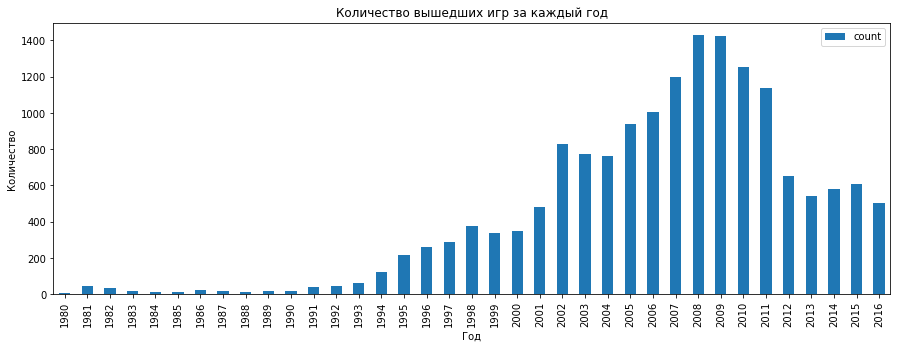

In [19]:
# построение гистограммы для определения возраста пользователей
year_name.plot(x='year_of_release', y='count', figsize=(15, 5), kind='bar')
plt.title('Количество вышедших игр за каждый год')
plt.xlabel('Год')
plt.ylabel('Количество')

In [20]:
# срез датафрейма data_games по году выхода позже 1993
data_games_new = data_games.query('year_of_release > 1993')

### Определение продаж по платформам

In [21]:
# группировка датафрейма data_games_new по платформе и подсчет суммарных продаж по каждой платформе
platform_sum_sales = data_games_new.groupby('platform')['sum_sales'].sum().sort_values()
platform_sum_sales

platform
PCFX       0.03
3DO        0.10
NES        0.11
TG16       0.16
SCD        0.36
NG         1.23
WS         1.42
GEN        8.13
DC        15.95
SAT       33.59
PSV       53.81
WiiU      82.19
SNES      84.67
GB       152.08
XOne     159.32
GC       196.73
N64      218.01
XB       251.57
PC       252.66
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.76
Wii      891.18
PS3      931.33
X360     961.24
PS2     1233.56
Name: sum_sales, dtype: float64

Text(0, 0.5, 'Суммарные продажи')

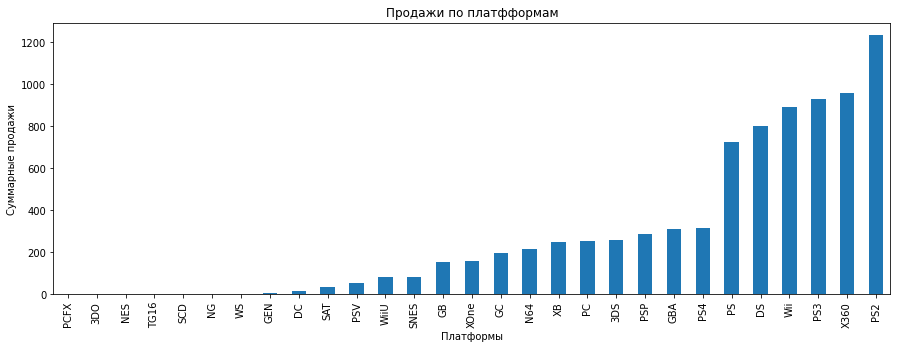

In [22]:
# построение гистограммы для определения суммарных продаж каждой платформы
platform_sum_sales.plot(x='platform', y='sum_sales', figsize=(15, 5), kind='bar')
plt.title('Продажи по платфформам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')

In [23]:
# срез датафрейма data_games_new, исключающий малопродаваемые платформы
data_games_new = data_games_new.query('(platform != "PCFX") & (platform != "3DO") & (platform != "NES") & (platform != "TG16")\
                                  & (platform != "SCD") & (platform != "NG") & (platform != "WS") & (platform != "GEN")\
                                  & (platform != "DC")')

In [24]:
# группировка датафрейма data_games_new по платформе и году и подсчет суммарных продаж каждой платформы за каждый год
revenue = data_games_new.groupby(['platform','year_of_release']).agg({'sum_sales':['sum'], 'sum_sales':['sum']}).reset_index()
revenue.head(20)

,platform,year_of_release,sum_sales
,,,sum
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
5,3DS,2016,15.14
6,DS,2004,17.27
7,DS,2005,130.14
8,DS,2006,119.81


In [25]:
# срез, включающий только платформу PS2
data_PS2 = data_games_new.query('platform == "PS2"')

In [26]:
# группировка датафрейма data_PS2 по году и подсчет суммарных продаж за каждый год
data_PS2 = (data_PS2.groupby('year_of_release')['sum_sales'].sum())
data_PS2

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: sum_sales, dtype: float64

Text(0, 0.5, 'Год')

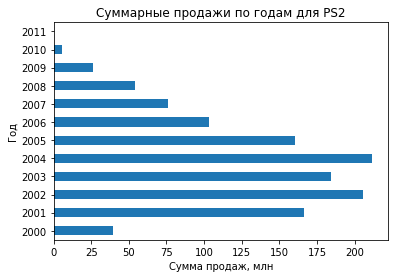

In [27]:
# построение графика суммарных продаж по годам для PS2
data_PS2.plot(kind='barh')
plt.title('Суммарные продажи по годам для PS2')
plt.xlabel('Сумма продаж, млн')
plt.ylabel('Год')

In [28]:
# срез, включающий только платформу X360
data_X360 = data_games_new.query('platform == "X360"')

In [29]:
# группировка датафрейма data_X360 по году и подсчет суммарных продаж за каждый год
data_X360 = (data_X360.groupby('year_of_release')['sum_sales'].sum())
data_X360

year_of_release
2005      8.25
2006     51.62
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: sum_sales, dtype: float64

Text(0, 0.5, 'Год')

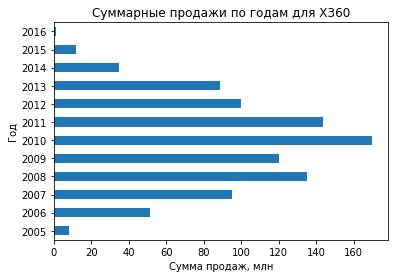

In [30]:
# построение графика суммарных продаж по годам для X360
data_X360.plot(kind='barh')
plt.title('Суммарные продажи по годам для X360')
plt.xlabel('Сумма продаж, млн')
plt.ylabel('Год')

In [31]:
# срез, включающий только платформу PS3
data_PS3 = data_games_new.query('platform == "PS3"')

In [32]:
# группировка датафрейма data_PS3 по году и подсчет суммарных продаж за каждый год
data_PS3 = (data_PS3.groupby('year_of_release')['sum_sales'].sum())
data_PS3

year_of_release
2006     20.96
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.35
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: sum_sales, dtype: float64

Text(0, 0.5, 'Год')

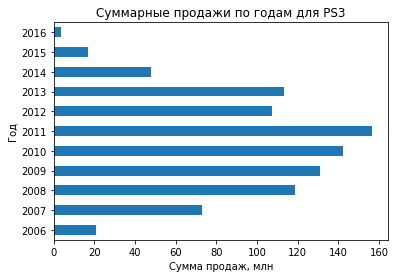

In [33]:
# построение графика суммарных продаж по годам для PS3
data_PS3.plot(kind='barh')
plt.title('Суммарные продажи по годам для PS3')
plt.xlabel('Сумма продаж, млн')
plt.ylabel('Год')

In [34]:
# срез, включающий только платформу Wii
data_Wii = data_games_new.query('platform == "Wii"')

In [35]:
# группировка датафрейма data_Wii по году и подсчет суммарных продаж за каждый год
data_Wii = (data_Wii.groupby('year_of_release')['sum_sales'].sum())
data_Wii

year_of_release
2006    137.15
2007    152.77
2008    171.32
2009    206.97
2010    127.95
2011     59.65
2012     21.71
2013      8.59
2014      3.75
2015      1.14
2016      0.18
Name: sum_sales, dtype: float64

Text(0, 0.5, 'Год')

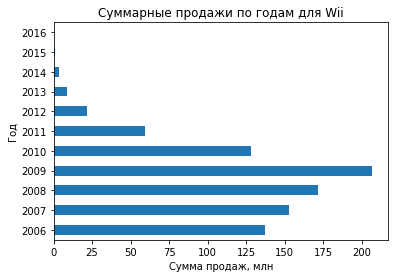

In [36]:
# построение графика суммарных продаж по годам для Wii
data_Wii.plot(kind='barh')
plt.title('Суммарные продажи по годам для Wii')
plt.xlabel('Сумма продаж, млн')
plt.ylabel('Год')

In [37]:
# срез, включающий только платформу DS
data_DS = data_games_new.query('platform == "DS"')

In [38]:
# группировка датафрейма data_DS по году и подсчет суммарных продаж за каждый год
data_DS = (data_DS.groupby('year_of_release')['sum_sales'].sum())
data_DS

year_of_release
2004     17.27
2005    130.14
2006    119.81
2007    146.94
2008    145.31
2009    119.54
2010     85.02
2011     26.18
2012     11.01
2013      1.54
Name: sum_sales, dtype: float64

Text(0, 0.5, 'Год')

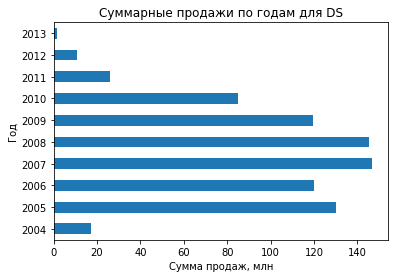

In [39]:
# построение графика суммарных продаж по годам для DS
data_DS.plot(kind='barh')
plt.title('Суммарные продажи по годам для DS')
plt.xlabel('Сумма продаж, млн')
plt.ylabel('Год')

In [40]:
# срез, включающий только платформу PS
data_PS = data_games_new.query('platform == "PS"')

In [41]:
# группировка датафрейма data_DS по году и подсчет суммарных продаж за каждый год
data_PS = (data_PS.groupby('year_of_release')['sum_sales'].sum())
data_PS

year_of_release
1994      6.03
1995     35.96
1996     94.70
1997    136.17
1998    169.49
1999    144.53
2000     96.37
2001     35.59
2002      6.67
2003      2.07
Name: sum_sales, dtype: float64

Text(0, 0.5, 'Год')

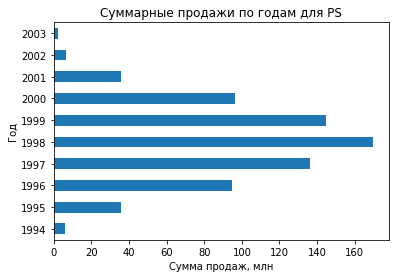

In [42]:
# построение графика суммарных продаж по годам для DS
data_PS.plot(kind='barh')
plt.title('Суммарные продажи по годам для PS')
plt.xlabel('Сумма продаж, млн')
plt.ylabel('Год')

In [43]:
# срез, включающий только платформу PS4
data_PS4 = data_games_new.query('platform == "PS4"')

In [44]:
# группировка датафрейма data_DS по году и подсчет суммарных продаж за каждый год
data_PS4_gr = (data_PS4.groupby('year_of_release')['sum_sales'].sum())
data_PS4_gr

year_of_release
2013     25.99
2014    100.00
2015    118.90
2016     69.25
Name: sum_sales, dtype: float64

Text(0, 0.5, 'Год')

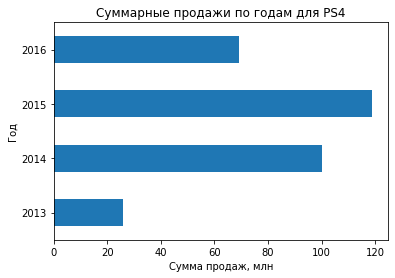

In [45]:
# построение графика суммарных продаж по годам для DS
data_PS4_gr.plot(kind='barh')
plt.title('Суммарные продажи по годам для PS4')
plt.xlabel('Сумма продаж, млн')
plt.ylabel('Год')

In [47]:
# Опредление срока жизни платформы после начала роста продаж 
lifetime_platform = data_games_new.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
lifetime_platform['life'] = lifetime_platform['max'] - lifetime_platform['min'] + 1 
lifetime_platform['life'].median()

8.0

Вывод: По данным гистограмм и медианным значениям можно сказать, что срок жизни платформы составляет 7 лет, если учитывать данные всего датасета, 8 лет - если учитывать данные с момента роста продаж.

### Определение актуального периода

In [48]:
# срез за актуальный период (3 года)
current_period = data_games_new.query('year_of_release >= 2014')

### Определение платформ, лидирующих по продажам за актуальный период

In [49]:
# группировка датафрейма platform_group_cp по платформе и подсчет суммарных продаж для каждой платформы
platform_group_cp = current_period.groupby('platform')['sum_sales'].sum().sort_values()
platform_group_cp

platform
PSP       0.36
Wii       5.07
PSV      22.40
PC       27.05
WiiU     42.98
X360     48.22
PS3      68.18
3DS      86.68
XOne    140.36
PS4     288.15
Name: sum_sales, dtype: float64

Вывод: Если взять актуальный период 3 года, то можно сказать, что такие платформы как PS4, XOne набирают популярность в отличии от остальных.

In [50]:
# Комментарий ревьюера
data_PS4.year_of_release.min()

2013

### Построение графика "ящик с усами"

Text(0, 0.5, 'Суммарные продажи')

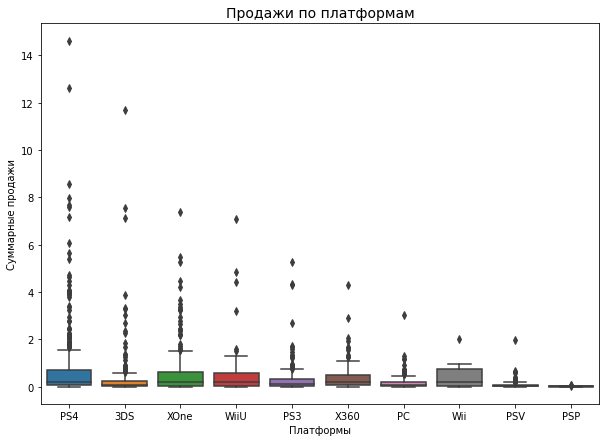

In [54]:
# построение графика "ящик с усами" для актуального периода
fig, ax = plt.subplots(figsize = (10,7))
boxplot = sns.boxplot(
    x='platform',
    y='sum_sales',
    data=current_period) 
boxplot.axes.set_title('Продажи по платформам', fontsize=14)
boxplot.set_xlabel('Платформы', fontsize=10)
boxplot.set_ylabel('Суммарные продажи', fontsize=10)

(0.0, 1.6)

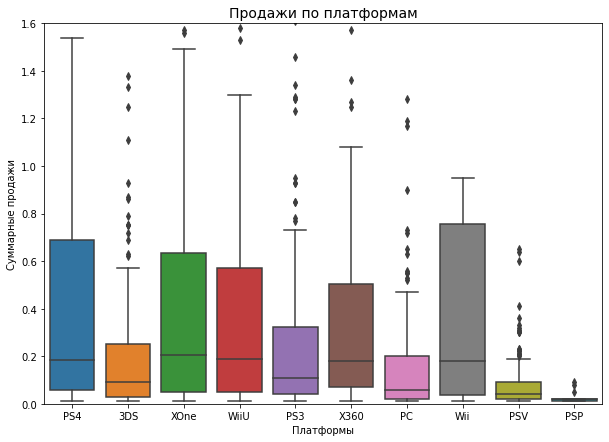

In [55]:
# построение масштабированного графика "ящик с усами" для актуального периода
fig, ax = plt.subplots(figsize = (10,7))
boxplot = sns.boxplot(
    x='platform',
    y='sum_sales',
    data=current_period) 
boxplot.axes.set_title('Продажи по платформам', fontsize=14)
boxplot.set_xlabel('Платформы', fontsize=10)
boxplot.set_ylabel('Суммарные продажи', fontsize=10)
boxplot.set_ylim(0,1.6)

Вывод:\
По данным графиков можно сказать:
- платформа PS4 имеет наибольшее число игр, которые имеют самые высокие показатели суммарных продаж;
- платформа 3DS имеет медиану равную 0,1 млн по суммарнымм продажам и имеет большое количество выбросов (игр), часть из которых успешно продавались;
- платформа XOne имеет самую высокую медиану, и большое количество выбросов, но суммарные продажи которых не превышают 8 млн;
- платформа WiiU имеет медиану, которая близка по значению с медианой платформы XOne, но имеет намного меньше выбросов, чем у платформы XOne;
- платформа PS3 имеет больше выбросов, чем у платформы WiiU, ее медиана сопоставима с медианой платформы 3DS, но большой межквартильный размах;
- платформа X360 имеет выбросы, не превышающие 5 млн, медиану, сопоставимую с платформами PS4, XOne, WiiU;
- платформа Wii имеет наибольший межквартильный размах, что говорит о самом высоком разбросе элементов с 25% до 75% значений, а также медиану, сопоставимую с платформами PS4, XOne, WiiU, X360.

### Влияние отзывов критиков и пользователей на продажи платформ

In [56]:
# срез, включающий только платформу PS4
current_period_PS4 = current_period.query('platform == "PS4"')

Text(0, 0.5, 'Суммарные продажи, млн')

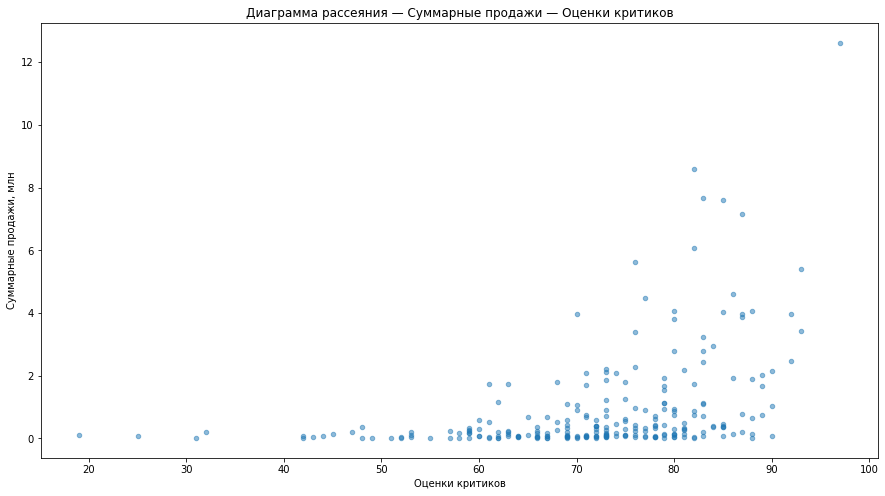

In [57]:
# построение диаграммы рассеяния для платформы PS4
current_period_PS4.plot(kind='scatter',
        y='sum_sales' , x='critic_score', alpha=0.5, figsize=(15,8))
plt.title('Диаграмма рассеяния — Суммарные продажи — Оценки критиков');
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи, млн')

In [58]:
# определение коэффициента корреляции для платформы PS4
current_period_PS4[['sum_sales','critic_score']].corr()

,sum_sales,critic_score
sum_sales,1.000000,0.402661
critic_score,0.402661,1.000000


Text(0, 0.5, 'Суммарные продажи, млн')

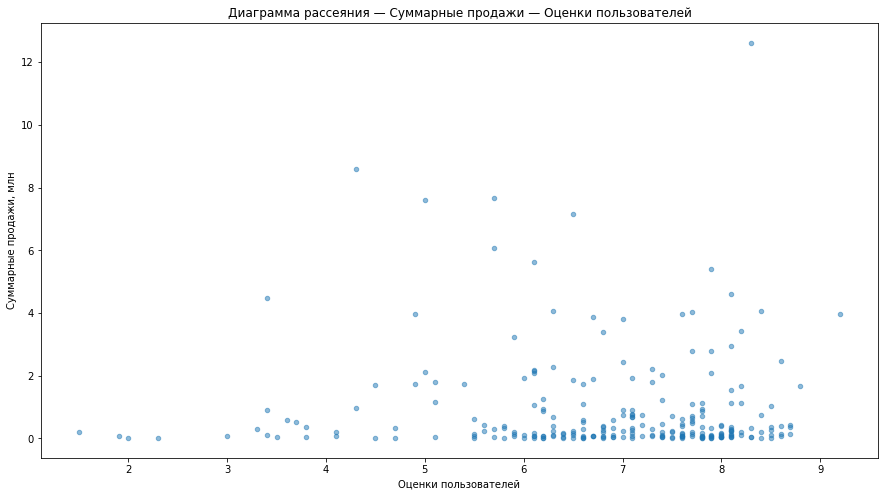

In [59]:
current_period_PS4.plot(kind='scatter',
        y='sum_sales' , x='user_score', alpha=0.5, figsize=(15,8))
plt.title('Диаграмма рассеяния — Суммарные продажи — Оценки пользователей');
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи, млн')

In [60]:
# определение коэффициента корреляции для платформы PS4
current_period_PS4[['sum_sales','user_score']].corr()

,sum_sales,user_score
sum_sales,1.000000,-0.040132
user_score,-0.040132,1.000000


In [61]:
# срез, включающий только платформу XOne
current_period_XOne = current_period.query('platform == "XOne"')

Text(0, 0.5, 'Суммарные продажи, млн')

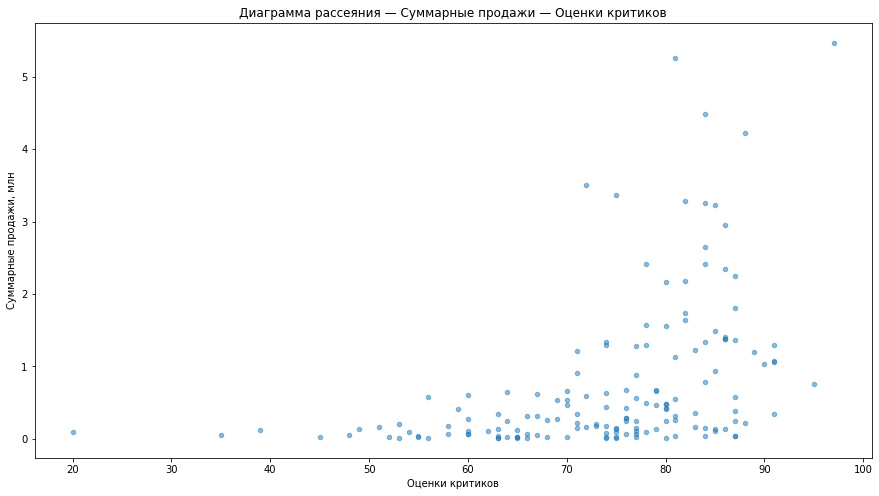

In [62]:
# построение диаграммы рассеяния для платформы XOne
current_period_XOne.plot(kind='scatter',
        y='sum_sales' , x='critic_score', alpha=0.5, figsize=(15,8))
plt.title('Диаграмма рассеяния — Суммарные продажи — Оценки критиков');
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи, млн')

In [63]:
# определение коэффициента корреляции для платформы XOne
current_period_XOne[['sum_sales','critic_score']].corr()

,sum_sales,critic_score
sum_sales,1.000000,0.428677
critic_score,0.428677,1.000000


Text(0, 0.5, 'Суммарные продажи, млн')

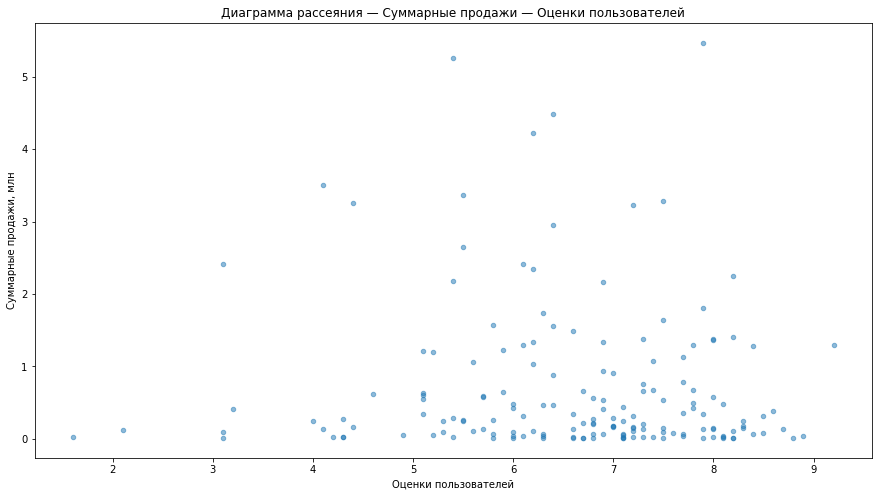

In [64]:
current_period_XOne.plot(kind='scatter',
        y='sum_sales' , x='user_score', alpha=0.5, figsize=(15,8))
plt.title('Диаграмма рассеяния — Суммарные продажи — Оценки пользователей');
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи, млн')

In [65]:
# определение коэффициента корреляции для платформы XOne
current_period_XOne[['sum_sales','user_score']].corr()

,sum_sales,user_score
sum_sales,1.000000,-0.070384
user_score,-0.070384,1.000000


In [66]:
# срез, включающий только платформу 3DS
current_period_3DS = current_period.query('platform == "3DS"')

Text(0, 0.5, 'Суммарные продажи, млн')

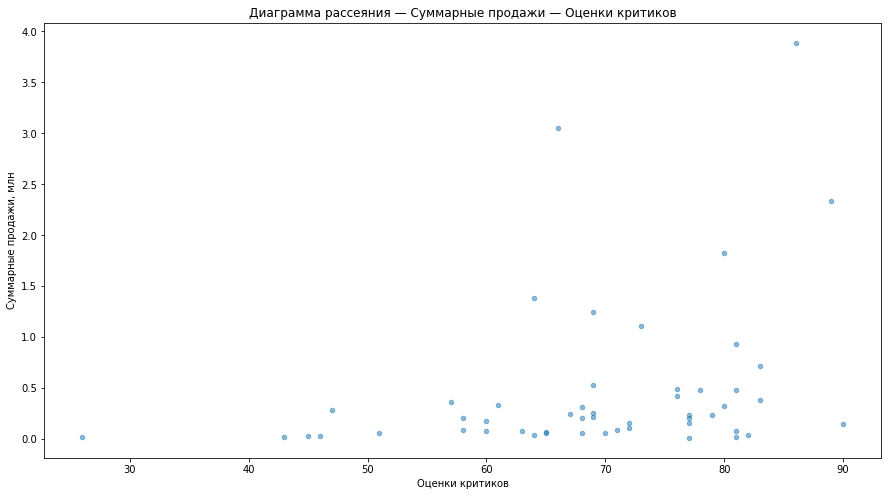

In [67]:
# построение диаграммы рассеяния для платформы 3DS
current_period_3DS.plot(kind='scatter',
        y='sum_sales' , x='critic_score', alpha=0.5, figsize=(15,8))
plt.title('Диаграмма рассеяния — Суммарные продажи — Оценки критиков');
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи, млн')

In [68]:
# определение коэффициента корреляции для платформы 3DS
current_period_3DS[['sum_sales','critic_score']].corr()

,sum_sales,critic_score
sum_sales,1.000000,0.314117
critic_score,0.314117,1.000000


Text(0, 0.5, 'Суммарные продажи, млн')

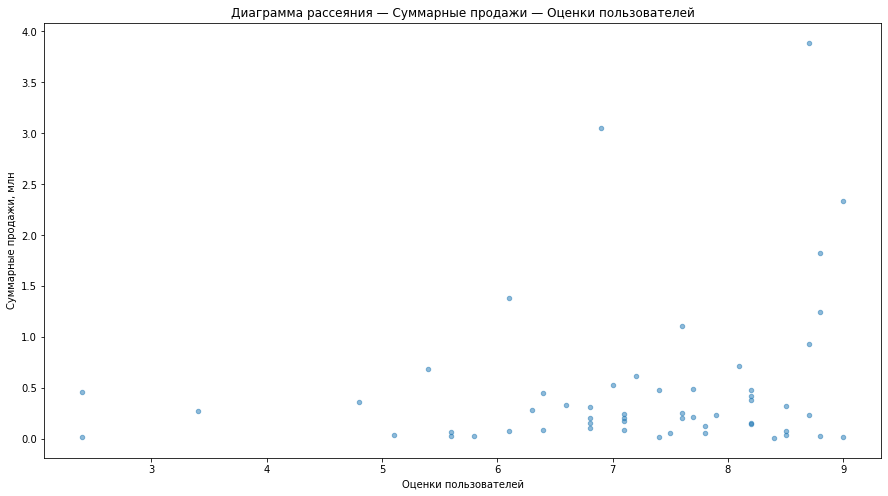

In [69]:
# построение диаграммы рассеяния для платформы 3DS
current_period_3DS.plot(kind='scatter',
        y='sum_sales' , x='user_score', alpha=0.5, figsize=(15,8))
plt.title('Диаграмма рассеяния — Суммарные продажи — Оценки пользователей');
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи, млн')

In [70]:
# определение коэффициента корреляции для платформы 3DS
current_period_3DS[['sum_sales','user_score']].corr()

,sum_sales,user_score
sum_sales,1.000000,0.215193
user_score,0.215193,1.000000


In [71]:
# срез, включающий только платформу PS3
current_period_PS3 = current_period.query('platform == "PS3"')

Text(0, 0.5, 'Суммарные продажи, млн')

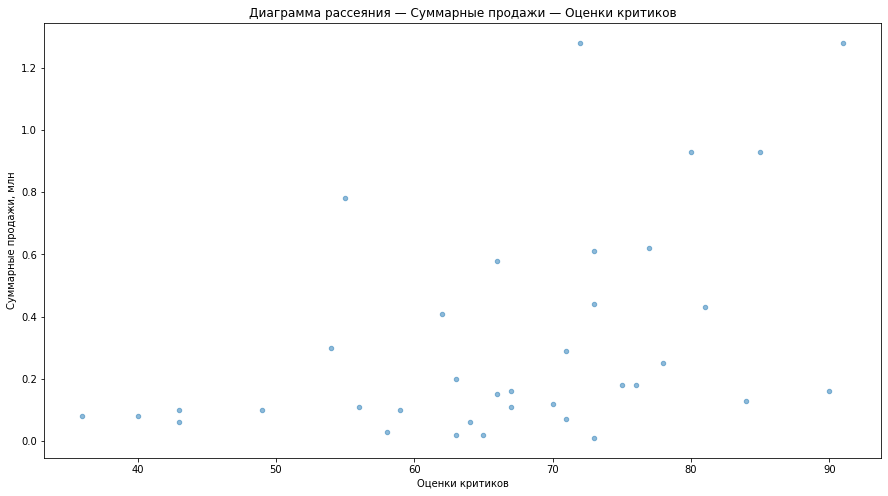

In [72]:
# построение диаграммы рассеяния для платформы PS3
current_period_PS3.plot(kind='scatter',
        y='sum_sales' , x='critic_score', alpha=0.5, figsize=(15,8))
plt.title('Диаграмма рассеяния — Суммарные продажи — Оценки критиков');
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи, млн')

In [73]:
# определение коэффициента корреляции для платформы PS3
current_period_PS3[['sum_sales','critic_score']].corr()

,sum_sales,critic_score
sum_sales,1.000000,0.446575
critic_score,0.446575,1.000000


Text(0, 0.5, 'Суммарные продажи, млн')

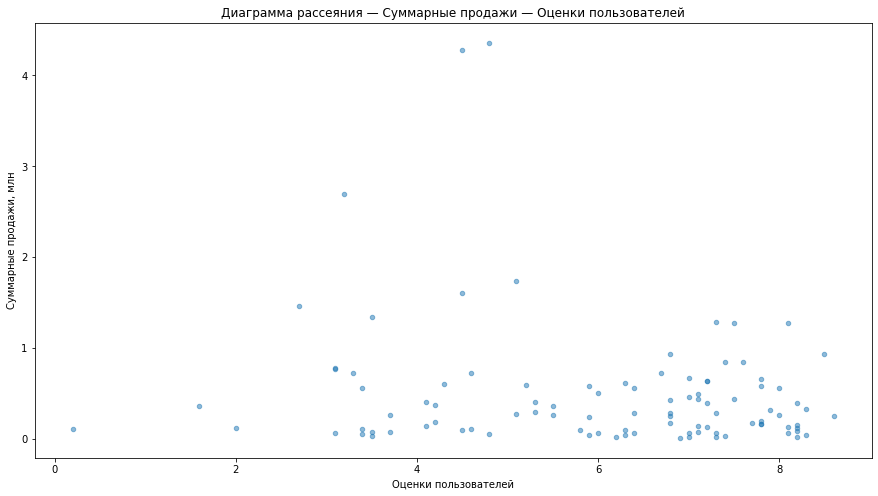

In [74]:
# построение диаграммы рассеяния для платформы 3DS
current_period_PS3.plot(kind='scatter',
        y='sum_sales' , x='user_score', alpha=0.5, figsize=(15,8))
plt.title('Диаграмма рассеяния — Суммарные продажи — Оценки пользователей');
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи, млн')

In [75]:
# определение коэффициента корреляции для платформы 3DS
current_period_PS3[['sum_sales','user_score']].corr()

,sum_sales,user_score
sum_sales,1.000000,-0.166761
user_score,-0.166761,1.000000


In [76]:
# срез, включающий только платформу X360
current_period_X360 = current_period.query('platform == "X360"')

Text(0, 0.5, 'Суммарные продажи, млн')

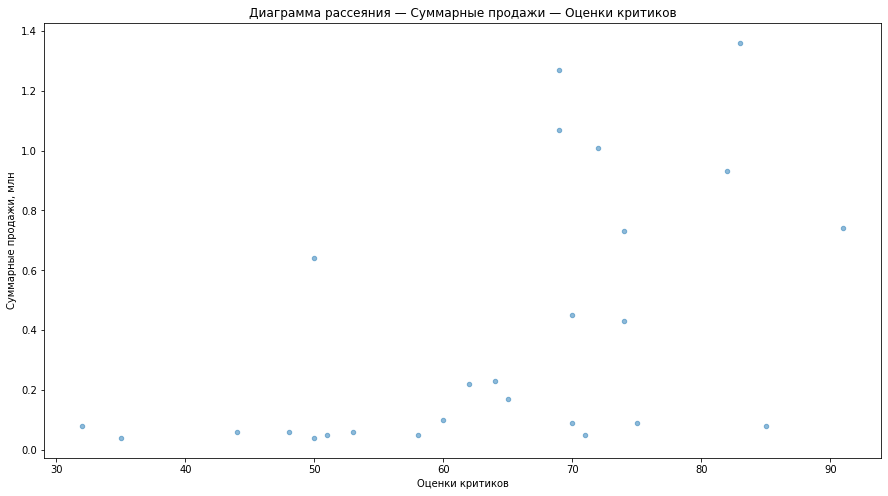

In [77]:
# построение диаграммы рассеяния для платформы X360
current_period_X360.plot(kind='scatter',
        y='sum_sales' , x='critic_score', alpha=0.5, figsize=(15,8))
plt.title('Диаграмма рассеяния — Суммарные продажи — Оценки критиков');
plt.xlabel('Оценки критиков')
plt.ylabel('Суммарные продажи, млн')

In [78]:
# определение коэффициента корреляции для платформы X360
current_period_X360[['sum_sales','critic_score']].corr()

,sum_sales,critic_score
sum_sales,1.000000,0.525723
critic_score,0.525723,1.000000


Text(0, 0.5, 'Суммарные продажи, млн')

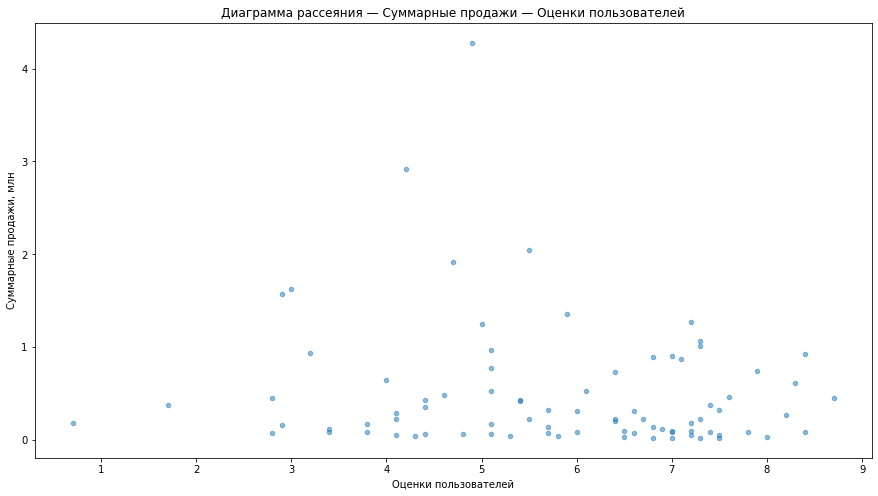

In [79]:
# построение диаграммы рассеяния для платформы X360
current_period_X360.plot(kind='scatter',
        y='sum_sales' , x='user_score', alpha=0.5, figsize=(15,8))
plt.title('Диаграмма рассеяния — Суммарные продажи — Оценки пользователей');
plt.xlabel('Оценки пользователей')
plt.ylabel('Суммарные продажи, млн')

In [80]:
# определение коэффициента корреляции для платформы X360
current_period_X360[['sum_sales','user_score']].corr()

,sum_sales,user_score
sum_sales,1.000000,-0.138445
user_score,-0.138445,1.000000


Вывод: исходя из графиков и коффициента корреляции можно судить следующее:\
Для платформ PS4, XOne, PS3, X360 и 3DS прослеживается прямая линейная зависимость между оценками критиков и суммарными продажами, однако значение коэффициента корреляции равно примерно 0,4, что говорит о том, что зависимость между данными показателями не сильная. Наибольший коэффицент корреляции наблюдается у платформы X360, равный 0,52, а наименьший - 3DS, равный 0,31.\
Оценка пользователей и суммарные продажи имеют обратную линейную зависимость для платформ PS4, XOne, PS3, X360, однако коэффициент Пирсона равен примерно -0,1, а значит линейная зависиммость между этими величинами практически отсутствует. Для платформы 3DS прослеживается прямая линейная зависимость между оценками пользователей и суммарными продажами, коэффициент Пирсона при это равен 0,215, что говорит о том, что зависимость между показателяи почти отсутствует.

### Распределение игр по жанрам

In [81]:
# группировка датафрейма current_period по столбцу genre и подсчет количества игр и медианы суммарных продаж для каждого жанра
top_genre = current_period.groupby('genre').agg({'name':['count'], 'sum_sales':['median']}).reset_index()
top_genre.columns = ['genre', 'count', 'sum_sales']
top_genre.sort_values(by='sum_sales', ascending=False).reset_index(drop=True)

,genre,count,sum_sales
0,Shooter,128,0.515
1,Sports,161,0.180
2,Platform,38,0.140
3,Fighting,60,0.125
4,Role-Playing,221,0.110
5,Simulation,44,0.100
6,Action,619,0.090
7,Misc,113,0.090
8,Racing,69,0.090
9,Strategy,37,0.060


Text(0, 0.5, 'Суммарные продажи')

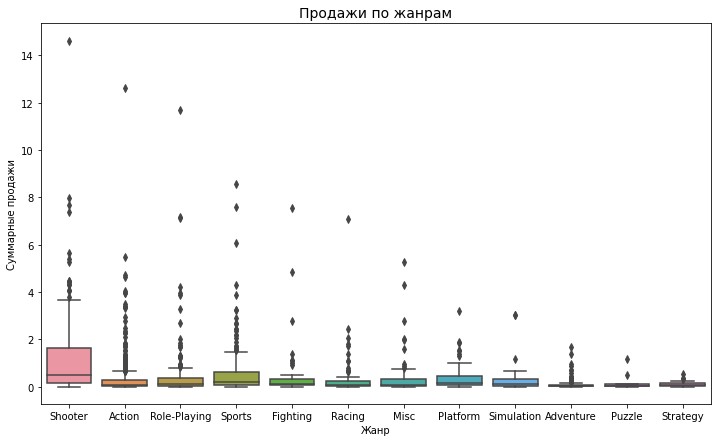

In [82]:
# построение графика "ящик с усами" для актуального периода
fig, ax = plt.subplots(figsize = (12,7))
boxplot = sns.boxplot(
    x='genre',
    y='sum_sales',
    data=current_period) 
boxplot.axes.set_title('Продажи по жанрам', fontsize=14)
boxplot.set_xlabel('Жанр', fontsize=10)
boxplot.set_ylabel('Суммарные продажи', fontsize=10)

(0.0, 4.0)

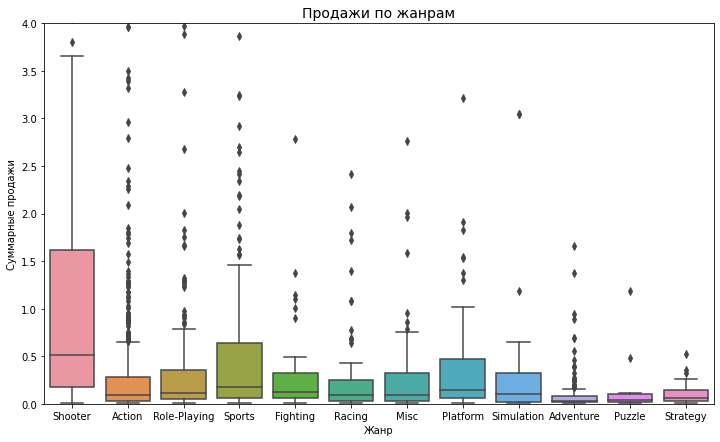

In [83]:
# построение графика "ящик с усами" для актуального периода
fig, ax = plt.subplots(figsize = (12,7))
boxplot = sns.boxplot(
    x='genre',
    y='sum_sales',
    data=current_period) 
boxplot.axes.set_title('Продажи по жанрам', fontsize=14)
boxplot.set_xlabel('Жанр', fontsize=10)
boxplot.set_ylabel('Суммарные продажи', fontsize=10)
boxplot.set_ylim(0,4)

Вывод:\
Самым прибыльным жанром с устойчивым спросом является жанр Shooter. На втором месте по медианному значению суммарных продаж находится Sports, но его значение более чем в 2 раза ниже, чем у Shooter. Остальные жанры имеют меньшее медианное значение суммарных продаж даже несмотря на то, что некоторые жанры насчитывают в разы больше игр.  

## Определение портрета пользователя каждого региона

### Самые популярные платформы

In [84]:
# группировка датафрейма data_games_new по платформе и подсчет суммарных продаж в Северной Америке
top_5_platforms_na = current_period.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
top_5_platforms_na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


In [85]:
# добавление строки, которая будет включать все платформы, не входящие в топ-5
top_5_platforms_na.loc['10','platform']='others'

In [86]:
# цикл, позволяющий найти суммарные продажи не ТОП-5
f=0
for row in top_5_platforms_na['na_sales']:
    if row < 20:
        f += row
top_5_platforms_na.loc['10','na_sales']=f

In [87]:
# срез, по ТОП-5 платформам и другим, включающие суммарные продажи остальных платформ
top_5_platforms_na = top_5_platforms_na.query('na_sales > 20').reset_index(drop=True)
top_5_platforms_na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,others,31.19


Text(0.5, 1.0, 'Соотношение использования платформ в Северной Америке')

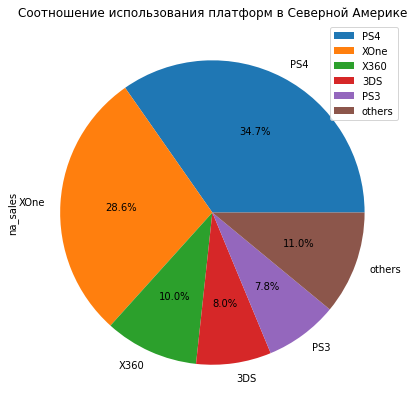

In [88]:
# построение круговой диаграммы с отображением долей каждой платформы
top_5_platforms_na.plot(y='na_sales', kind='pie', autopct='%1.1f%%', 
                        labels = ['PS4', 'XOne', 'X360', '3DS', 'PS3','others'], figsize=(12,7))
plt.title("Соотношение использования платформ в Северной Америке")

In [89]:
# группировка датафрейма data_games_new по платформе и подсчет суммарных продаж в Европе
top_5_platforms_eu = current_period.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
top_5_platforms_eu

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59
9,PSP,0.00


In [90]:
# добавление строки, которая будет включать все платформы, не входящие в топ-5
top_5_platforms_eu.loc['10','platform']='others'

In [91]:
# цикл, позволяющий найти суммарные продажи не ТОП-5
f=0
for row in top_5_platforms_eu['eu_sales']:
    if row < 16:
        f += row
top_5_platforms_eu.loc['10','eu_sales']=f

In [92]:
# срез, по ТОП-5 платформам и другим, включающие суммарные продажи остальных платформ
top_5_platforms_eu = top_5_platforms_eu.query('eu_sales > 16').reset_index(drop=True)
top_5_platforms_eu

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,others,34.76


Text(0.5, 1.0, 'Соотношение использования платформ в Европе')

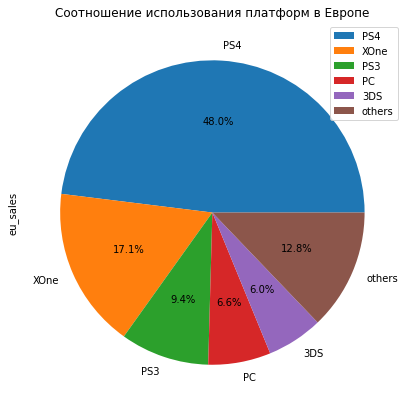

In [93]:
# построение круговой диаграммы с отображением долей каждой платформы
top_5_platforms_eu.plot(y='eu_sales', kind='pie', autopct='%1.1f%%', 
                        labels = ['PS4', 'XOne', 'PS3', 'PC', '3DS', 'others'], figsize=(12,7))
plt.title("Соотношение использования платформ в Европе")

In [94]:
# группировка датафрейма data_games_new по платформе и подсчет суммарных продаж в Европе
top_5_platforms_jp = current_period.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
top_5_platforms_jp

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


In [95]:
# добавление строки, которая будет включать все платформы, не входящие в топ-5
top_5_platforms_jp.loc['10','platform']='others'

In [96]:
# цикл, позволяющий найти суммарные продажи не ТОП-5
f=0
for row in top_5_platforms_jp['jp_sales']:
    if row < 7:
        f += row
top_5_platforms_jp.loc['10','jp_sales']=f

In [97]:
# срез, по ТОП-5 платформам и другим, включающие суммарные продажи остальных платформ
top_5_platforms_jp = top_5_platforms_jp.query('jp_sales > 0.5').reset_index(drop=True)
top_5_platforms_jp

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,others,0.76


Text(0.5, 1.0, 'Соотношение использования платформ в Японии')

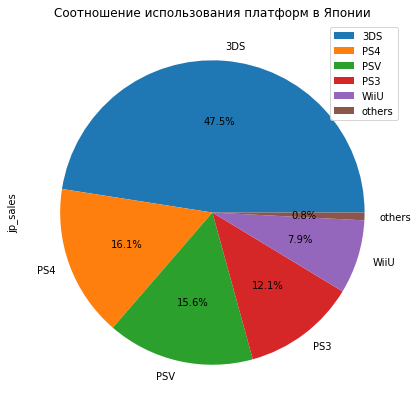

In [98]:
# построение круговой диаграммы с отображением долей каждой платформы
top_5_platforms_jp.plot(y='jp_sales', kind='pie', autopct='%1.1f%%', 
                        labels = ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU', 'others'], figsize=(12,7))
plt.title("Соотношение использования платформ в Японии")

Вывод:\
В Северной Америке более половины продаж приходится на две платформы: PS4 и XOne, при этом они поделены почти в равных долях, а суммарные продажи всех остальных платформ занимают 10 и менее процентов.\
В Европе также большая часть суммарных продаж приходится на 2 две платформы: PS4 и XOne, но PS4 занимает 48 процента, а XOne - 17,1, что говорить о доминировании платформы PS4 в данном регионе. Платформы PS3, PC и 3DS, входящие в ТОП-5, занимают менее 10% каждая, а платформы, не входдящие в ТОП-5, - 12,8%.\
В Японии почти половина суммарных продаж приходится на платформу 3DS. PS4, популярная в двух других регионах, в Японии занимает 16,1% от суммарных продаж. 15,6% занимает платформа PSV, а на платформы, не входящие в ТОП-5 приходится лищь 0,8%. Популярность таких платформ как 3DS, PSV, WiiU в Японии можно объяснить тем, что данные платформы разрабатывались двумя японскими компаниями - Nintendo и Sony. 


### Самые популярные жанры

In [99]:
# группировка датафрейма current_period жанру и подсчет количества игр и суммарных продаж для каждого жанра в Северной Америке
popular_genre_na = current_period.groupby('genre').agg({'na_sales':['sum']}).reset_index()
popular_genre_na.columns = ['genre', 'na_sales']
popular_genre_na=popular_genre_na.sort_values(by='na_sales', ascending=False).reset_index(drop=True)
popular_genre_na

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Fighting,12.43
6,Racing,8.74
7,Platform,6.79
8,Adventure,5.64
9,Simulation,2.63


In [100]:
# добавление строки, которая будет включать все жанры, не входящие в топ-5
popular_genre_na.loc['12','genre']='others'

In [101]:
# цикл, позволяющий найти суммарные продажи не ТОП-5
f=0
for row in popular_genre_na['na_sales']:
    if row < 15:
        f += row 
popular_genre_na.loc['12','na_sales']=f

In [102]:
# срез, по ТОП-5 жанрам и другим, включающие суммарные продажи остальных жанров
top_5_popular_genre_na = popular_genre_na.query('na_sales > 15').reset_index(drop=True)
top_5_popular_genre_na

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,others,37.86


Text(0.5, 1.0, 'Соотношение суммарных продаж в Северной Америке для каждого жанра')

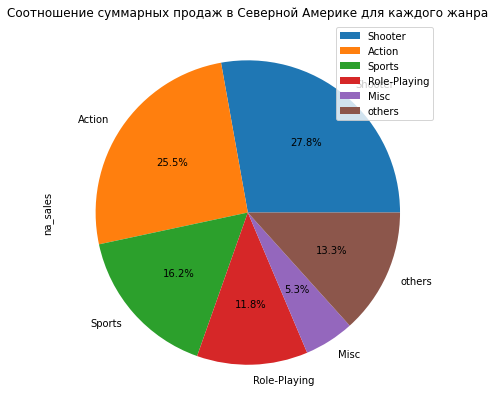

In [103]:
# построение круговой диаграммы с отображением долей каждой платформы
top_5_popular_genre_na.plot(y='na_sales', kind='pie', autopct='%1.1f%%', 
                        labels = ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc', 'others'], figsize=(12,7))
plt.title("Соотношение суммарных продаж в Северной Америке для каждого жанра")

In [104]:
# группировка датафрейма current_period жанру и подсчет количества игр и суммарных продаж для каждого жанра в Европе
popular_genre_eu = current_period.groupby('genre').agg({'eu_sales':['sum']}).reset_index()
popular_genre_eu.columns = ['genre', 'eu_sales']
popular_genre_eu=popular_genre_eu.sort_values(by='eu_sales', ascending=False).reset_index(drop=True)
popular_genre_eu

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Misc,12.86
6,Simulation,7.30
7,Platform,6.80
8,Fighting,6.69
9,Adventure,6.49


In [105]:
# добавление строки, которая будет включать все жанры, не входящие в топ-5
popular_genre_eu.loc['12','genre']='others'

In [106]:
# цикл, позволяющий найти суммарные продажи не ТОП-5
f=0
for row in popular_genre_eu['eu_sales']:
    if row < 14:
        f += row 
popular_genre_eu.loc['12','eu_sales']=f

In [107]:
# срез, по ТОП-5 жанрам и другим, включающие суммарные продажи остальных жанров
top_5_popular_genre_eu = popular_genre_eu.query('eu_sales > 14').reset_index(drop=True)
top_5_popular_genre_eu

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,others,42.45


Text(0.5, 1.0, 'Соотношение суммарных продаж в Европе для каждого жанра')

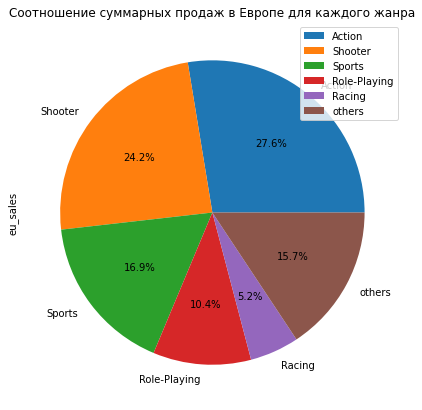

In [108]:
# построение круговой диаграммы с отображением долей каждой платформы
top_5_popular_genre_eu.plot(y='eu_sales', kind='pie', autopct='%1.1f%%', 
                        labels = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing', 'others'], figsize=(12,7))
plt.title("Соотношение суммарных продаж в Европе для каждого жанра")

In [109]:
# группировка датафрейма current_period жанру и подсчет количества игр и суммарных продаж для каждого жанра в Японии
popular_genre_jp = current_period.groupby('genre').agg({'jp_sales':['sum']}).reset_index()
popular_genre_jp.columns = ['genre', 'jp_sales']
popular_genre_jp=popular_genre_jp.sort_values(by='jp_sales', ascending=False).reset_index(drop=True)
popular_genre_jp

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Adventure,3.60
6,Sports,3.26
7,Platform,2.69
8,Simulation,2.31
9,Racing,1.76


In [110]:
# добавление строки, которая будет включать все жанры, не входящие в топ-5
popular_genre_jp.loc['12','genre']='others'

In [111]:
# цикл, позволяющий найти суммарные продажи не ТОП-5
f=0
for row in popular_genre_jp['jp_sales']:
    if row < 4:
        f += row 
popular_genre_jp.loc['12','jp_sales']=f

In [112]:
# срез, по ТОП-5 жанрам и другим, включающие суммарные продажи остальных жанров
top_5_popular_genre_jp = popular_genre_jp.query('jp_sales > 4').reset_index(drop=True)
top_5_popular_genre_jp

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,others,15.50


Text(0.5, 1.0, 'Соотношение суммарных продаж в Японии для каждого жанра')

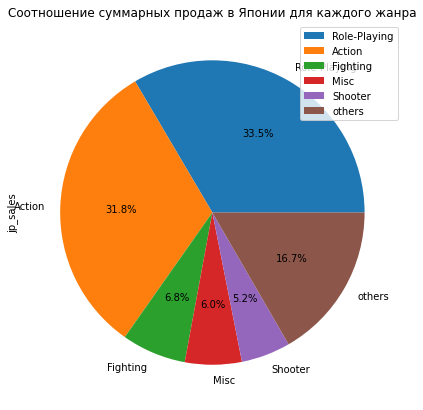

In [113]:
# построение круговой диаграммы с отображением долей каждой платформы
top_5_popular_genre_jp.plot(y='jp_sales', kind='pie', autopct='%1.1f%%', 
                        labels = ['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter', 'others'], figsize=(12,7))
plt.title("Соотношение суммарных продаж в Японии для каждого жанра")

Вывод:\
В Северной Америке и Европе популярность жанров схожа - более половины суммарных продаж приходится на такие жанры как Shooter и  Action. На третьем месте в обоих регионах находится Sports, занимающий около 17% суммарных продаж.
В отличии от Северной Америки и Европы в Японии 2/3 суммарных продаж приходится на Role-Playing и Action, при этом их доли практически равны. Каждый из трех жанров, входящих в ТОП-5, занимает примерно 5-7%, а на остальные жанры приходится 16,7%.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [114]:
# группировка датафрейма current_period по рейтингу ESRB и подсчет суммарных продаж в Северной Америке
ESRB_na_sales = current_period.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
ESRB_na_sales

,rating,na_sales
0,M,96.42
1,not fill,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


Text(0.5, 1.0, 'Соотношение суммарных продаж в Северной Америке для рейтинга ESRB')

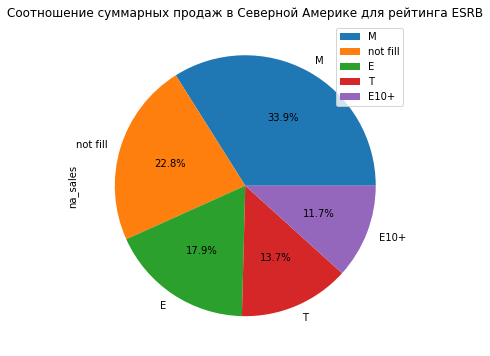

In [115]:
# построение круговой диаграммы с отображением долей рейтинга ESRB
ESRB_na_sales.plot(y='na_sales', kind='pie', autopct='%1.1f%%', 
                        labels = ['M', 'not fill', 'E', 'T', 'E10+'], figsize=(7,6))
plt.title("Соотношение суммарных продаж в Северной Америке для рейтинга ESRB")

In [116]:
# группировка датафрейма current_period по рейтингу ESRB и подсчет суммарных продаж в Европе
ESRB_eu_sales = current_period.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
ESRB_eu_sales

,rating,eu_sales
0,M,93.44
1,not fill,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


Text(0.5, 1.0, 'Соотношение суммарных продаж в Европе для рейтинга ESRB')

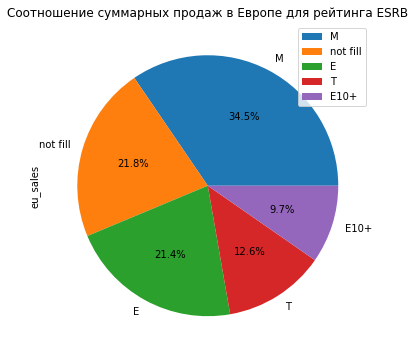

In [117]:
# построение круговой диаграммы с отображением долей рейтинга ESRB
ESRB_eu_sales.plot(y='eu_sales', kind='pie', autopct='%1.1f%%', 
                        labels = ['M', 'not fill', 'E', 'T', 'E10+'], figsize=(7,6))
plt.title("Соотношение суммарных продаж в Европе для рейтинга ESRB")

In [118]:
# группировка датафрейма current_period по рейтингу ESRB и подсчет суммарных продаж в Японии
ESRB_jp_sales = current_period.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
ESRB_jp_sales

,rating,jp_sales
0,not fill,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


Text(0.5, 1.0, 'Соотношение суммарных продаж в Японии для рейтинга ESRB')

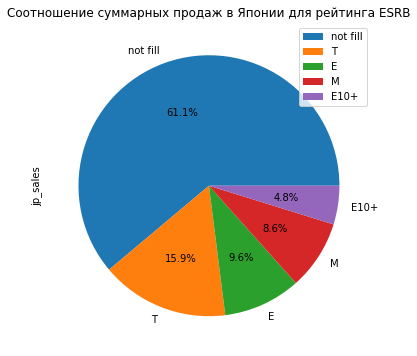

In [119]:
# построение круговой диаграммы с отображением долей рейтинга ESRB
ESRB_jp_sales.plot(y='jp_sales', kind='pie', autopct='%1.1f%%', 
                        labels = ['not fill', 'T', 'E', 'M', 'E10+'], figsize=(7,6))
plt.title("Соотношение суммарных продаж в Японии для рейтинга ESRB")

Вывод:\
    Исходя из полученных данных, можно сделать вывод о том, что портреты пользователей из Северной Америке и Европы схожи. В этих регионах широкой популярностью пользуются платформы PS4 и XOne, при этом самой популярной платформой остается PS4. Также в этих регионах популярны жанры Shooter и Action и преобладают игры с рейтингом ESRB - М.\
    В Японии ситуация другая, в этом регионе 47,5% суммарных продаж приходится на платформу 3DS. PS4, популярная в двух других регионах, в Японии занимает 16,1% от суммарных продаж. Также в Японии наиболее популярными жанрами являются Role-Playing и Action. Рейтинг ESRB в большинстве игр в Японии не определен. Из этого можно предположить то, что в Японии наиболее продаваемые игры выпускались не в Канаде и не в США.   

## Проверка гипотез

### Гипотеза №1

Необходимо проверить средние пользовательские рейтинги платформ Xbox One и PC. Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые, альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One не равны. Мы имеем две независимые выборки, следовательно для проверки будем использовать метод из библиотеки scipy: scipy.stats.ttest_ind

In [121]:
# срез, включчающий только платформу XOne за актуальный период
xbox_one = current_period.query('platform == "XOne"')

In [122]:
# удаление пропусков из столбцов user_score
xbox_one = xbox_one.dropna(subset=['user_score'])

In [123]:
# срез, включчающий только платформу PC за актуальный период
pc = current_period.query('platform == "PC"')

In [124]:
# удаление пропусков из столбцов user_score
pc = pc.dropna(subset=['user_score'])

In [125]:
xbox_one_selection = xbox_one['user_score']
pc_selection = pc['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xbox_one_selection, pc_selection)

print(f'средний пользовательский рейтинг платформы Xbox One: {np.mean(xbox_one_selection)}')
print(f'средний пользовательский рейтинг платформы PC: {np.mean(pc_selection)}')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

средний пользовательский рейтинг платформы Xbox One: 6.594545454545456
средний пользовательский рейтинг платформы PC: 6.298360655737705
p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Вывод: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Гипотеза №2

Необходимо проверить средние пользовательские рейтинги жанров Action и Sports. Нулевая гипотеза - средние пользовательские рейтинги одинаковы. Альтернативная гипотеза - средние пользовательские рейтинги не равны. Мы имеем две независимые выборки, следовательно для проверки будем использовать метод из библиотеки scipy: scipy.stats.ttest_ind

In [126]:
# срез, включающий только жанр Action за актуальный период
Action = current_period.query('genre == "Action"')

In [127]:
# удаление пропусков из столбцов user_score
Action = Action.dropna(subset=['user_score'])

In [128]:
# срез, включающий только жанр Sports за актуальный период
Sports = current_period.query('genre == "Sports"')

In [129]:
# удаление пропусков из столбцов user_score
Sports = Sports.dropna(subset=['user_score'])

In [130]:
Action_selection = Action['user_score']
Sports_selection = Sports['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(Action_selection, Sports_selection)

print(f'средний пользовательский рейтинг жанра Action: {np.mean(Action_selection)}')
print(f'средний пользовательский рейтинг жанра Sports: {np.mean(Sports_selection)}')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

средний пользовательский рейтинг жанра Action: 6.760606060606061
средний пользовательский рейтинг жанра Sports: 5.2251968503937
p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Вывод: средние пользовательские рейтинги жанров Action и Sports не равны.

### Пояснение о выборе гипотез

Исходя из задания нам надо было сравнить средние двух генеральных совокупностей, у нас есть две независимые выборки, следовательно необходимо использовать двухвыборочный t-тест для независимых выборок (метод из библиотеки scipy: scipy.stats.ttest_ind). Нулевая гипотеза формулируется как «истинные средние этих двух ГС равны». А альтернативную гипотезу формулируем как двухстороннюю и отличную от нулевой.

## Вывод

В результате выполнения проекта были выполнены:
- Преобработка данных. На этом этапе датафрейм был приведен к корректному оформлению, а также добавлен новый необходимый столбец sum_sales, позволяющий сделать выводы о суммарных продажах игр во всех регионах.
- Исследовательский анализ данных. Работа на этом этапе позволила понять, как игры были распределены по годам, платформам, жанрам, а также выбрать актуальный период, необходимый для правильного прогноза.
- Составлен портрет пользователя каждого региона. После выполнения данного этапа было выявлено, что портрет пользователя Северной Америки и Европы очень схожи: и у тех, и у других очень популярны платформы PS4 и XOne, и жанры Shooter и Action, а также преобладают игры с рейтингом ESRB - М. Япония сильно отличается от Северной Америки и Европы, там пользователи предпочитают платформу 3DS, а наиболее популярными жанрами являются Role-Playing и Action. Рейтинг ESRB в большинстве игр в Японии не определен, что говорит о том, что они предпочитают игры разработанные не в США или Канаде.
- Проверка гипотез. На данном этапе было выявлено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports не равны.\

На основании всех данных можно сказать, что потенциально успешным продуктом в 2017 году будут являться игры, выпущенные в жанрах Shooter и Action, для платформ PS4 и XOne. Также было бы рекоменддовано обратить внимание на такие регионы как Северная Америка и Европа, так как суммарные продажи в этих регионах в разы выше, чем в Японии.